#Распознание объектов на изображениях из набора данных CIFAR-10

In [1]:
!pip install pillow

In [3]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [4]:
# Размер мини-выборки
batch_size = 32
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений 
img_rows, img_cols = 32,32
# Количество каналов в изображений: RGB
img_channels = 3
# Названия класов из набора данных CIFAR-10
classes = ['самолет','автомобиль','птица','кот','олень','собака','лягушка','лошадь','корабль','грузовик']

## Подготовка данных

In [5]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


*Просмотр примеров данных*

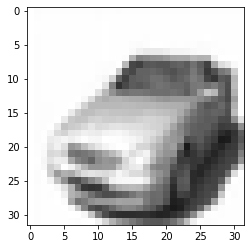

Номер класса: [1]
Тип объекта: автомобиль


In [6]:
n = 9595
plt.imshow(Image.fromarray(X_train[n]))
plt.show()
print("Номер класса:",y_train[n])
print("Тип объекта:",classes[y_train[n][0]])

*Нормализуем данные*

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


*Преобразуем правильные ответы в формат one hot encoding*

In [8]:
Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Создаем нейронную сеть

In [9]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

*Печатаем информацию о сети*

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

*Компилируем модель*

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [12]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/25
1407/1407 - 12s - loss: 1.5276 - accuracy: 0.4437 - val_loss: 1.1731 - val_accuracy: 0.5706
Epoch 2/25
1407/1407 - 5s - loss: 1.1193 - accuracy: 0.6002 - val_loss: 0.8911 - val_accuracy: 0.6866
Epoch 3/25
1407/1407 - 5s - loss: 0.9699 - accuracy: 0.6576 - val_loss: 0.8040 - val_accuracy: 0.7140
Epoch 4/25
1407/1407 - 5s - loss: 0.8719 - accuracy: 0.6942 - val_loss: 0.7763 - val_accuracy: 0.7338
Epoch 5/25
1407/1407 - 5s - loss: 0.8007 - accuracy: 0.7175 - val_loss: 0.7172 - val_accuracy: 0.7512
Epoch 6/25
1407/1407 - 5s - loss: 0.7581 - accuracy: 0.7339 - val_loss: 0.6941 - val_accuracy: 0.7590
Epoch 7/25
1407/1407 - 5s - loss: 0.7103 - accuracy: 0.7517 - val_loss: 0.6602 - val_accuracy: 0.7736
Epoch 8/25
1407/1407 - 5s - loss: 0.6726 - accuracy: 0.7612 - val_loss: 0.6692 - val_accuracy: 0.7752
Epoch 9/25
1407/1407 - 5s - loss: 0.6499 - accuracy: 0.7706 - val_loss: 0.6881 - val_accuracy: 0.7702
Epoch 10/25
1407/1407 - 5s - loss: 0.6174 - accuracy: 0.7826 - val_loss: 0.6541 -

## Оцениваем качеcтво обучения сети

In [13]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 77.91%


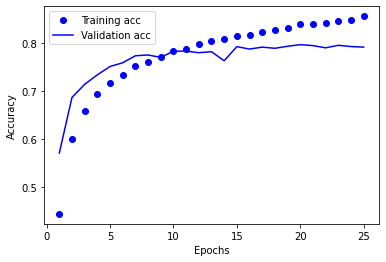

In [14]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [15]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.h5")

In [16]:
!ls

cifar10_model.h5  cifar10_model.json  sample_data


In [17]:
from google.colab import files

In [18]:
files.download("cifar10_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
files.download("cifar10_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Применяем сеть для распознавания объектов на изображениях

*Просмотр изображения из набора данных для тестирования*

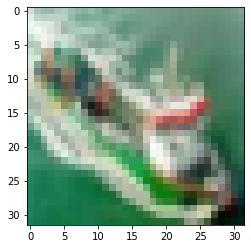

In [32]:
index=15
plt.imshow(Image.fromarray((X_test[index] * 255).astype(np.uint8)))
plt.show()

*Преобразование тестового изображения*

In [33]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

*Запуск распознавания*

In [34]:
prediction = model.predict(x)

*Печатаем результаты распознавания*

In [35]:
print(prediction)

[[5.37691312e-06 7.79186109e-07 1.38899268e-04 6.74679677e-06
  2.75422252e-07 4.92733747e-08 2.10131988e-01 1.08583776e-11
  7.89715827e-01 1.90722389e-08]]


*Преобразуем результаты из формата one hot encoding*

In [36]:
prediction = np.argmax(prediction)
print(classes[prediction])

корабль


*Печатаем правильный ответ*

In [37]:
print(classes[y_test[index][0]])

корабль


## Распознаем дополнительное изображение

In [47]:
from google.colab import output
from google.colab import files
files.upload()
output.clear()

*Проверяем загрузку файлов*

In [48]:
!ls

'cat (1).PNG'   cat.PNG   cifar10_model.h5   cifar10_model.json   sample_data


*Смотрим загруженную картинку*

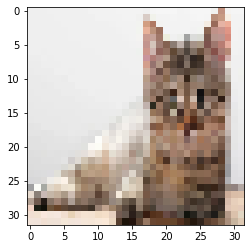

In [49]:
img_path = 'cat.PNG'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

*Преобразуем картинку в массив для распознавания*

In [50]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

*Запускаем распознавание*

In [51]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

кот
